In [8]:
import json

# Load the JSON data
with open("class_heirachy.json", "r") as file:
    data = json.load(file)

# Reversing the hierarchy
reverse_hierarchy = {}

for key, values in data.items():
    for value in values:
        if value not in reverse_hierarchy:
            reverse_hierarchy[value] = []
        reverse_hierarchy[value].append(key)

reverse_hierarchy

{'Desserts': ['Cobblers',
  'Coffee Cakes',
  'Cookies',
  'Creme Brulee',
  'Crisps and Crumbles',
  'Cupcakes',
  'Danishes',
  'Divinity',
  'Doughnuts',
  'Drop Cookies',
  'Flan',
  'Fondant',
  'Frostings and Icings',
  'Fruitcakes',
  'Fudge',
  'Gingerbread Cookies',
  'Gingersnaps',
  'Angel Food Cakes',
  'Apple Pie',
  'Banana Breads',
  'Bar Cookies',
  'Biscotti',
  'Blintzes',
  'Blondies',
  'Blueberry Pie',
  'Brownies',
  'Cakes',
  'Carrot Cakes',
  'Cheesecakes',
  'Cherry Pie',
  'Chess Pie',
  'Chocolate Cakes',
  'Chocolate Chip Cookies',
  'Chocolate Fudge',
  'Christmas Cookies',
  'Cinnamon Rolls',
  'Ice Cream',
  'Jell-O Salads',
  'Key Lime Pie',
  'Kolache',
  'Lemon Bars',
  'Macaroons',
  'Mincemeat Pie',
  'Monkey Bread',
  'Mousses',
  'Muffins',
  'Oatmeal Cookies',
  'Pastries',
  'Pavlovas',
  'Peanut Butter Cookies',
  'Pecan Pie',
  'Pie Crusts',
  'Pies',
  'Popovers and Yorkshire Puddings',
  'Pound Cakes',
  'Pumpkin Breads',
  'Pumpkin Pie',
  

In [11]:
!pip install networkx

  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


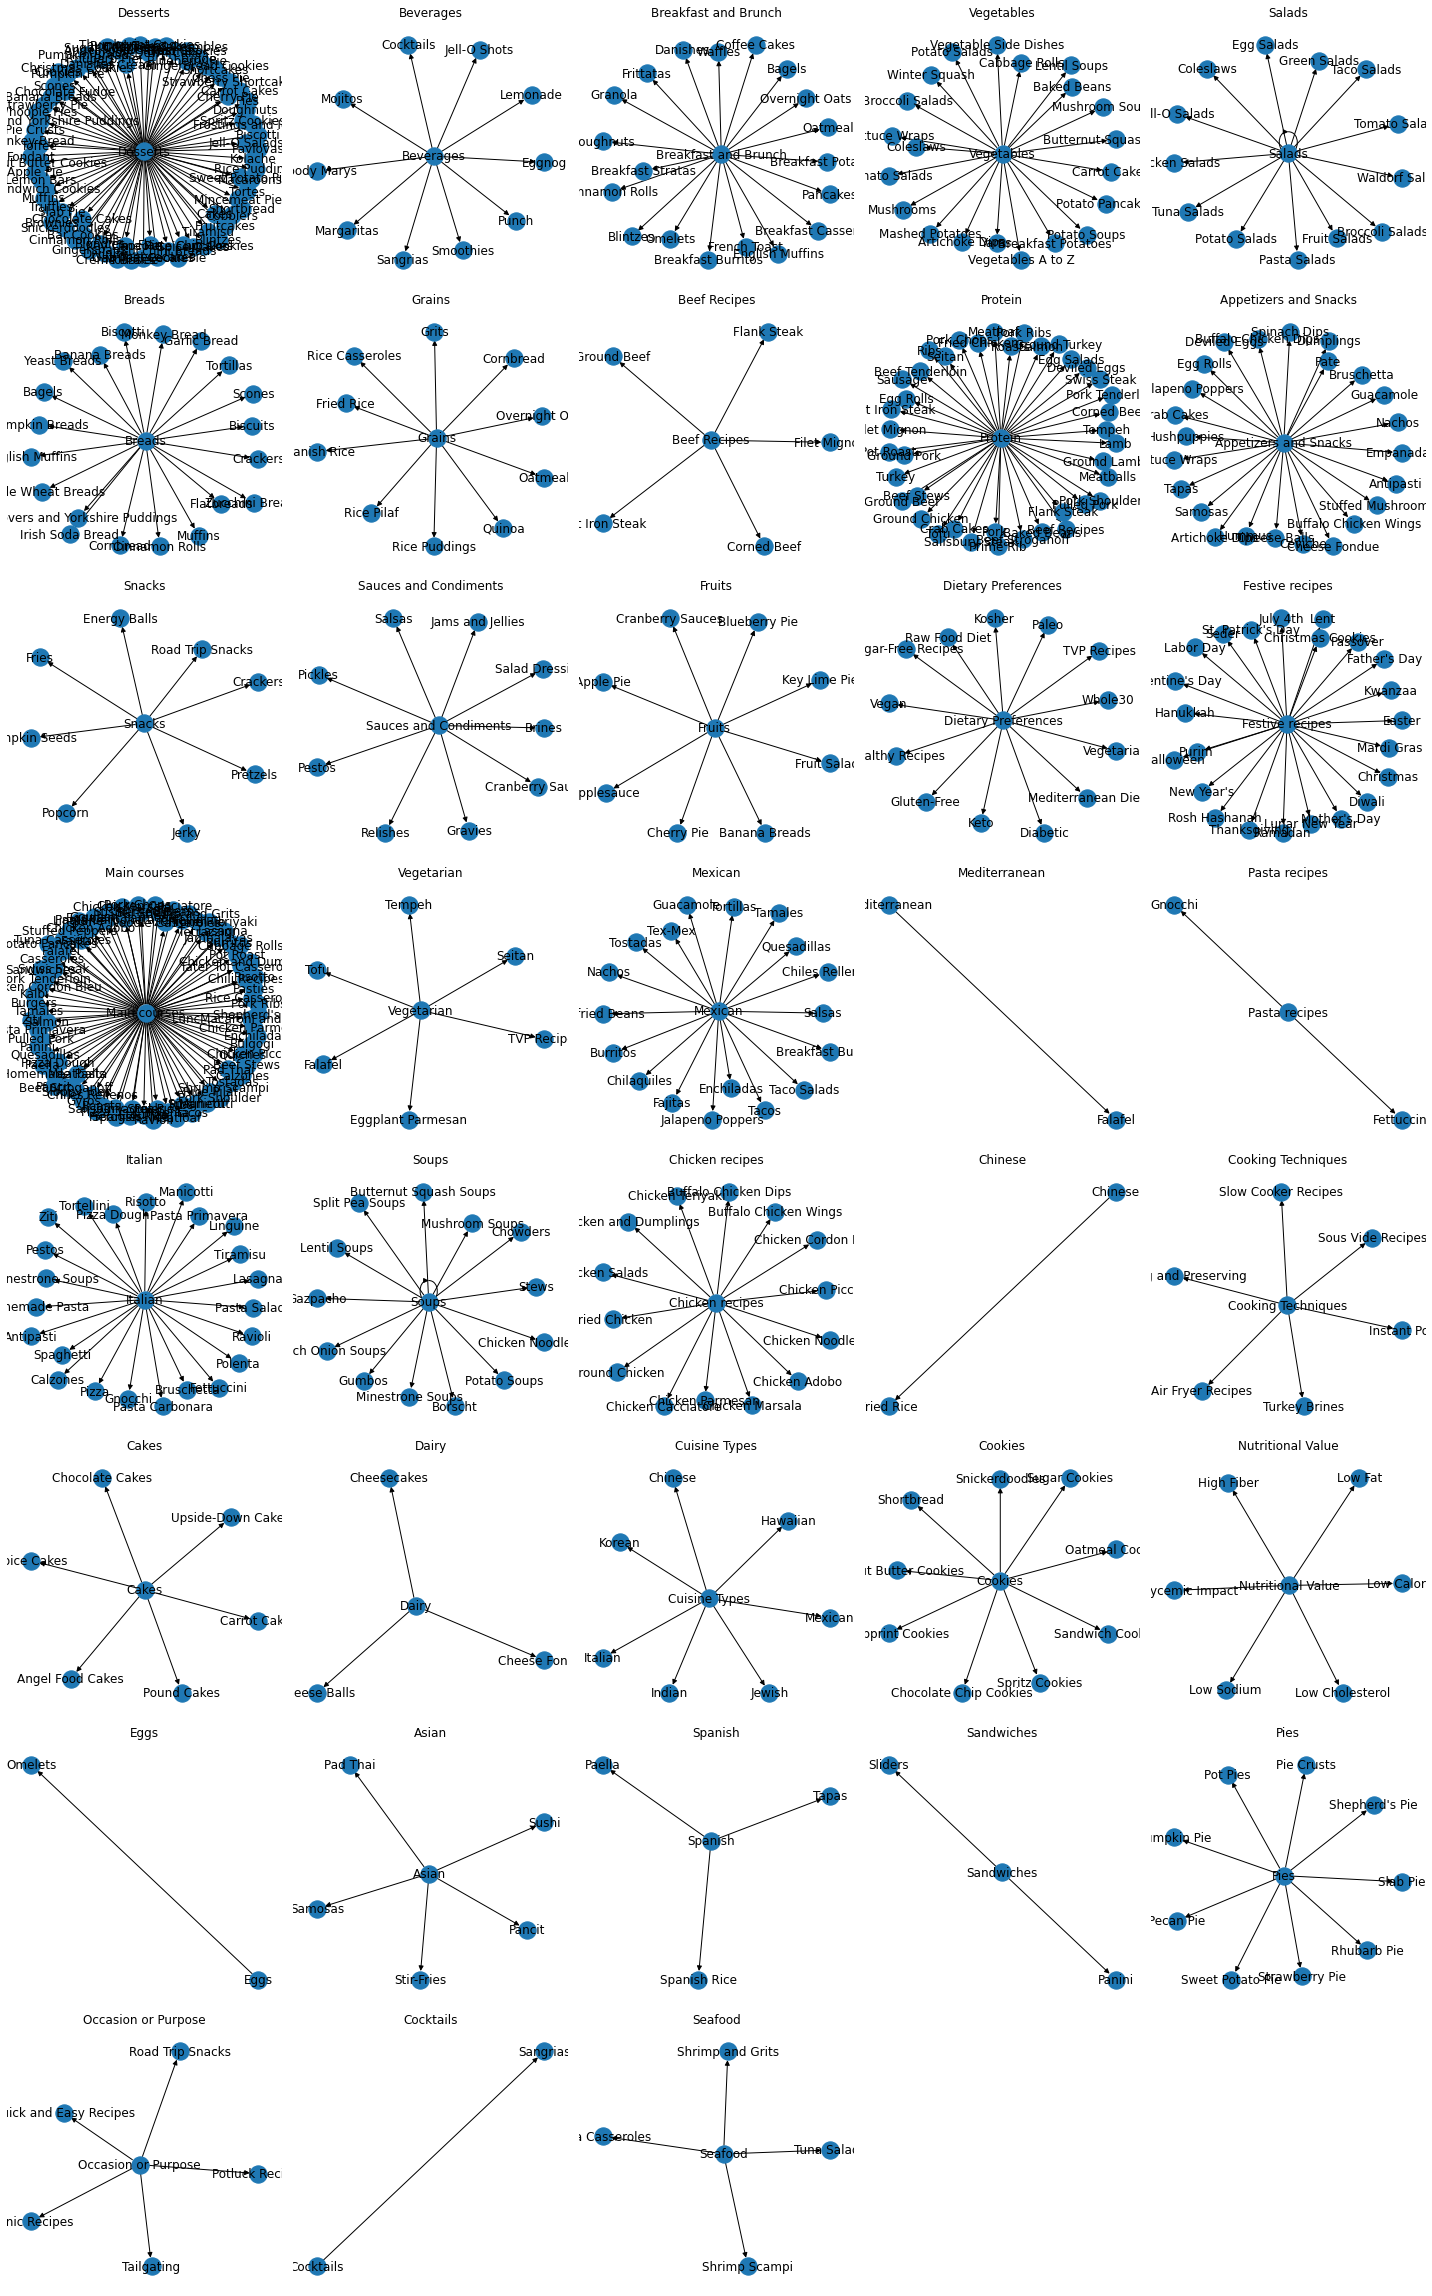

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Load the data again
with open("reversed_class_hierarchy.json", "r") as file:
    data = json.load(file)

# Helper function to plot a tree for a specific root node
def plot_tree_for_root(root, data, ax):
    tree = nx.DiGraph()
    tree.add_node(root)
    
    if root in data:
        for child in data[root]:
            tree.add_node(child)
            tree.add_edge(root, child)
    
    pos = nx.spring_layout(tree)
    nx.draw(tree, pos, with_labels=True, ax=ax)
    ax.set_title(root)

# Count the root nodes to determine the layout
num_root_nodes = len(data.keys())
num_columns = 5
num_rows = (num_root_nodes // num_columns) + (1 if num_root_nodes % num_columns != 0 else 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 4*num_rows))
axes = axes.flatten()

for idx, root in enumerate(data.keys()):
    plot_tree_for_root(root, data, axes[idx])

# Hide any remaining empty subplots
for idx in range(num_root_nodes, num_rows*num_columns):
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

In [16]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


## Wordcloud_BW

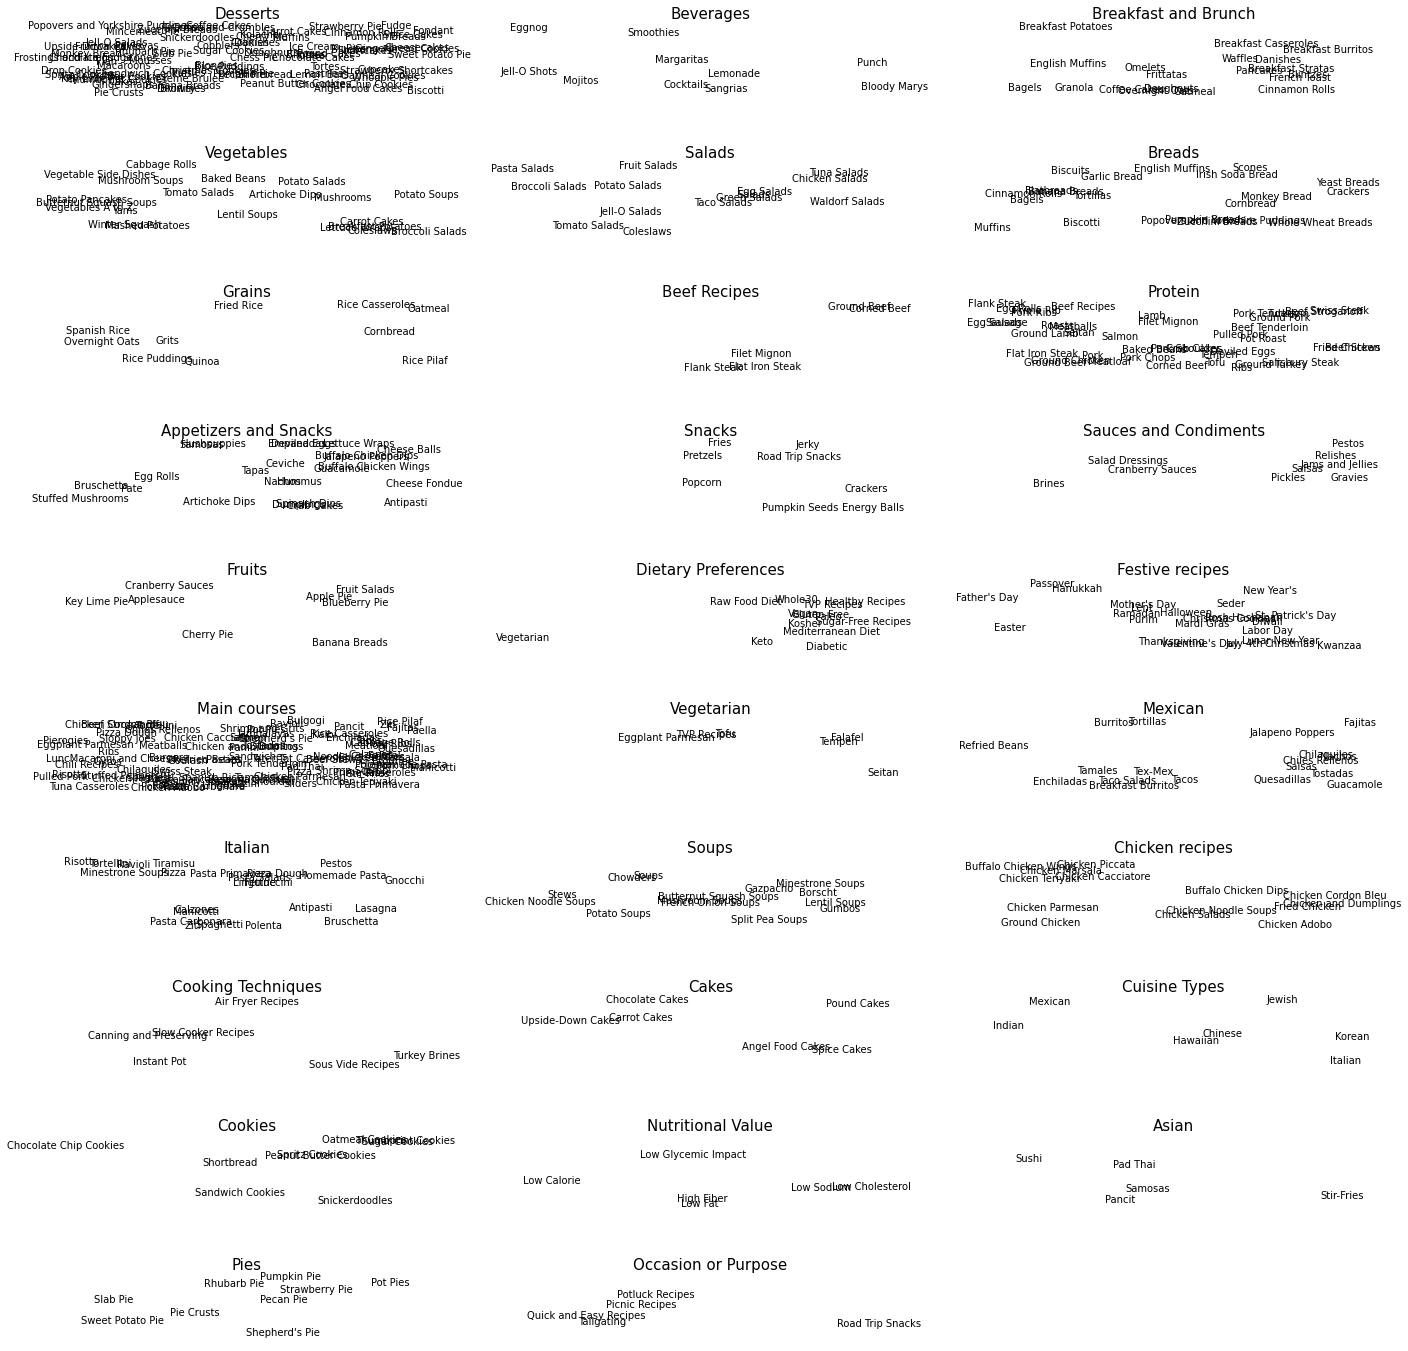

In [23]:
import matplotlib.pyplot as plt
import json
import numpy as np

def plot_text_cloud(data, title, ax):
    """Plot a text cloud for given data and title on the given axis."""
    unique_items = list(set(data))
    x_coords = np.random.rand(len(unique_items))
    y_coords = np.random.rand(len(unique_items))
    
    for i, item in enumerate(unique_items):
        ax.text(x_coords[i], y_coords[i], item, ha='center', va='center', fontsize=10)
    
    ax.set_title(title, fontsize=15)
    ax.axis('off')

# Load the JSON data
with open("reversed_class_hierarchy.json", "r") as file:
    data = json.load(file)

filtered_data = {k: v for k, v in data.items() if len(v) > 4}

num_categories = len(filtered_data)
cols = 3
rows = (num_categories // cols) + (1 if num_categories % cols else 0)

fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=5.0)

if rows == 1:
    axs = [axs]
if cols == 1:
    axs = [[ax] for ax in axs]

col = 0
row = 0

for category, subclasses in filtered_data.items():
    plot_text_cloud(subclasses, category, axs[row][col])
    
    col += 1
    if col == cols:
        col = 0
        row += 1

for i in range(row, rows):
    for j in range(col, cols):
        axs[i][j].axis('off')

plt.show()


In [ ]:
#

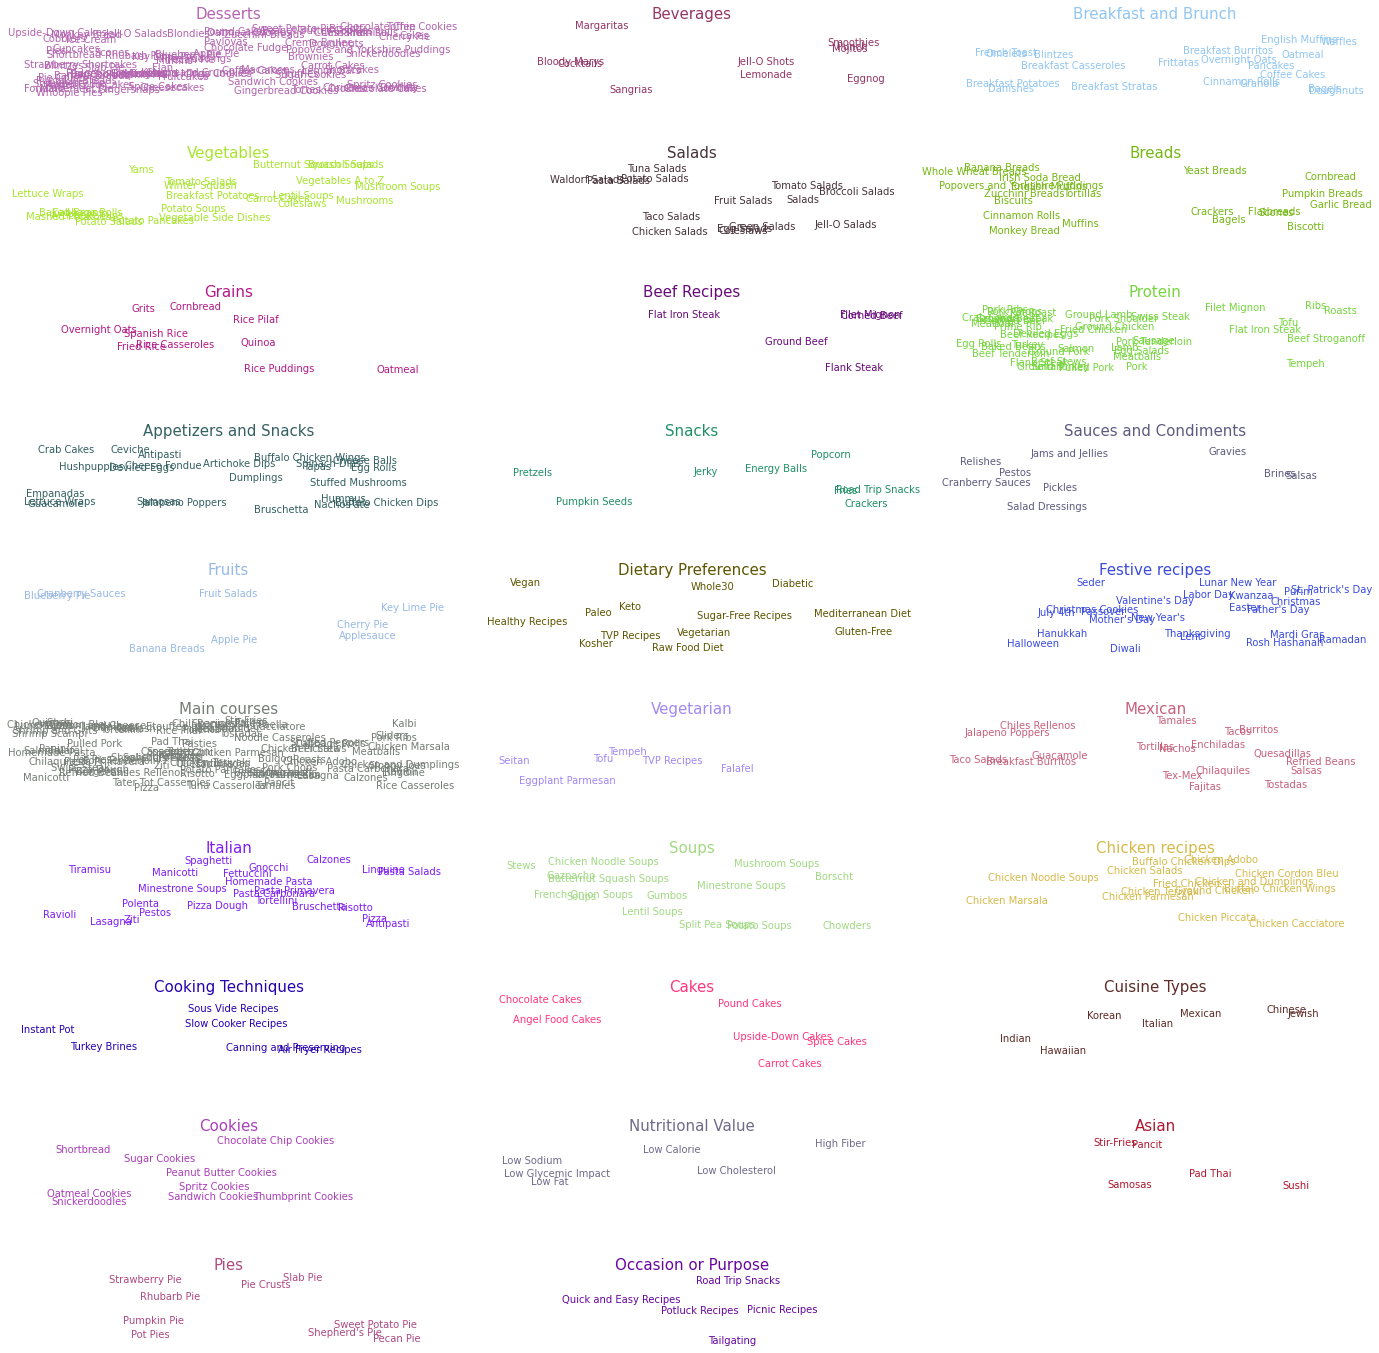

In [24]:
import matplotlib.pyplot as plt
import json
import numpy as np
import random

def plot_text_cloud(data, title, ax, color):
    """Plot a text cloud for given data and title on the given axis."""
    unique_items = list(set(data))
    x_coords = np.random.rand(len(unique_items))
    y_coords = np.random.rand(len(unique_items))
    
    for i, item in enumerate(unique_items):
        ax.text(x_coords[i], y_coords[i], item, ha='center', va='center', fontsize=10, color=color)
    
    ax.set_title(title, fontsize=15, color=color)
    ax.axis('off')

# Function to generate a random color
def random_color():
    return "#" + ''.join([random.choice('0123456789ABCDEF') for i in range(6)])

# Load the JSON data
with open("reversed_class_hierarchy.json", "r") as file:
    data = json.load(file)

filtered_data = {k: v for k, v in data.items() if len(v) > 4}

num_categories = len(filtered_data)
cols = 3
rows = (num_categories // cols) + (1 if num_categories % cols else 0)

fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=5.0)

if rows == 1:
    axs = [axs]
if cols == 1:
    axs = [[ax] for ax in axs]

col = 0
row = 0

for category, subclasses in filtered_data.items():
    color = random_color()
    plot_text_cloud(subclasses, category, axs[row][col], color)
    
    col += 1
    if col == cols:
        col = 0
        row += 1

for i in range(row, rows):
    for j in range(col, cols):
        axs[i][j].axis('off')

plt.show()


## Wordcloud final

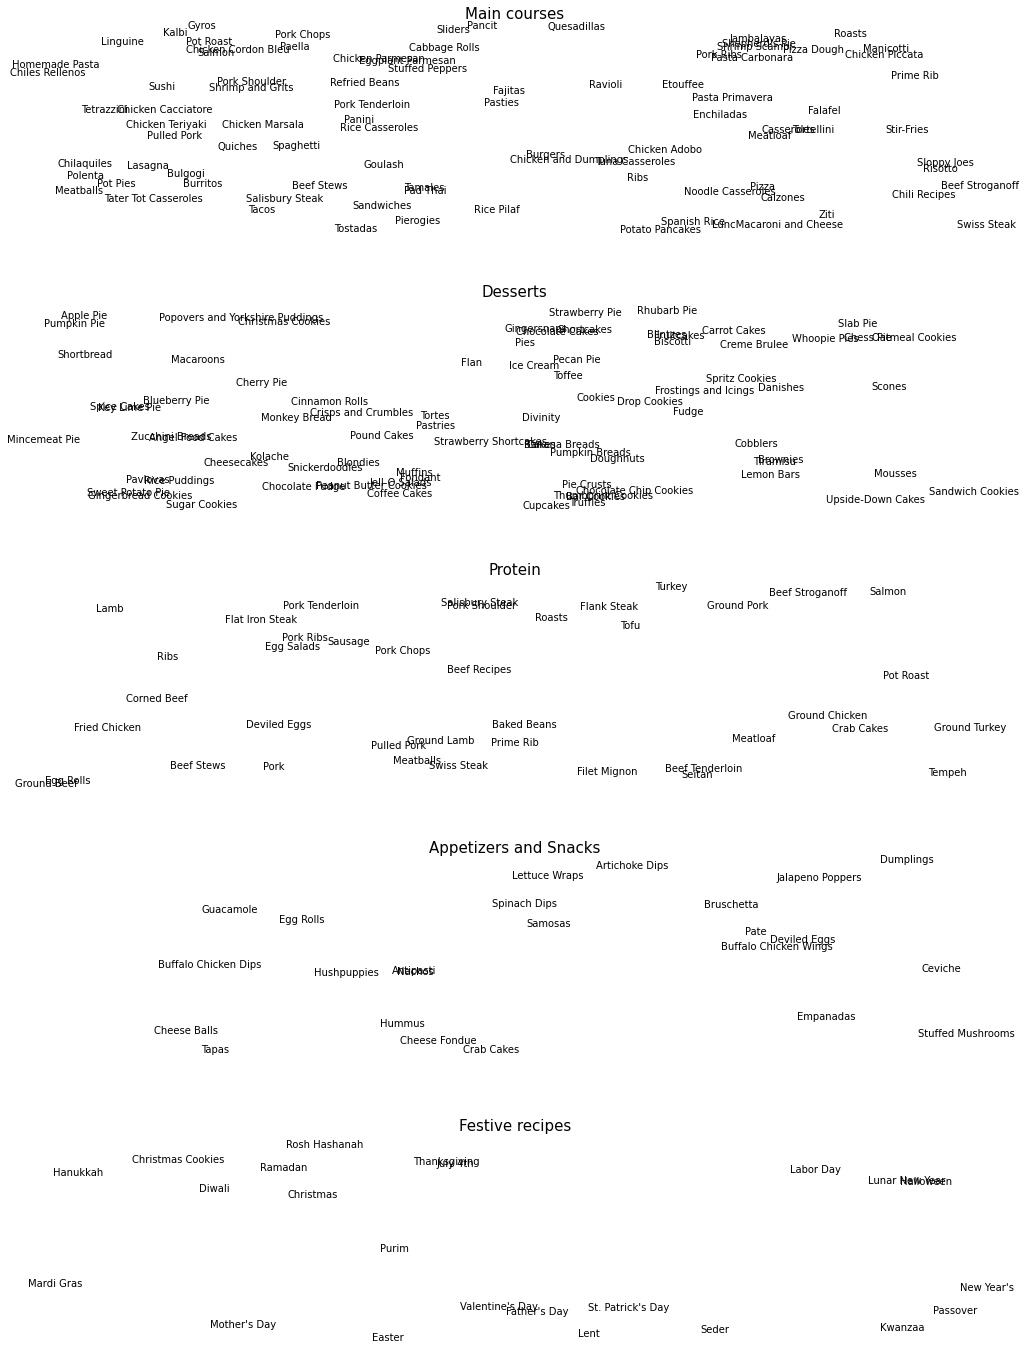

In [45]:
import matplotlib.pyplot as plt
import json
import numpy as np
import random

def plot_text_cloud(data, title, ax, color):
    """Plot a text cloud for given data and title on the given axis."""
    unique_items = list(set(data))
    x_coords = np.random.rand(len(unique_items))
    y_coords = np.random.rand(len(unique_items))
    
    for i, item in enumerate(unique_items):
        ax.text(x_coords[i], y_coords[i], item, ha='center', va='center', fontsize=10, color=color)
    
    ax.set_title(title, fontsize=15, color=color)
    ax.axis('off')

# Function to generate a random color
def random_color():
    return "black"#"#" + ''.join([random.choice('0123456789ABCDEF') for i in range(6)])

# Load the JSON data
with open("reversed_class_hierarchy.json", "r") as file:
    data = json.load(file)

filtered_data = {k: v for k, v in data.items() if len(v) > 4}

# Sort the data by number of subclasses
sorted_data = dict(sorted(filtered_data.items(), key=lambda item: len(item[1]), reverse=True))

# Extract top 10 superclasses
top_10_data = {k: sorted_data[k] for k in list(sorted_data)[:5]}

fig, axs = plt.subplots(5, 1, figsize=(15, 20))
fig.tight_layout(pad=5.0)

for i, (category, subclasses) in enumerate(top_10_data.items()):
    color = random_color()
    plot_text_cloud(subclasses, category, axs[i], color)

plt.show()


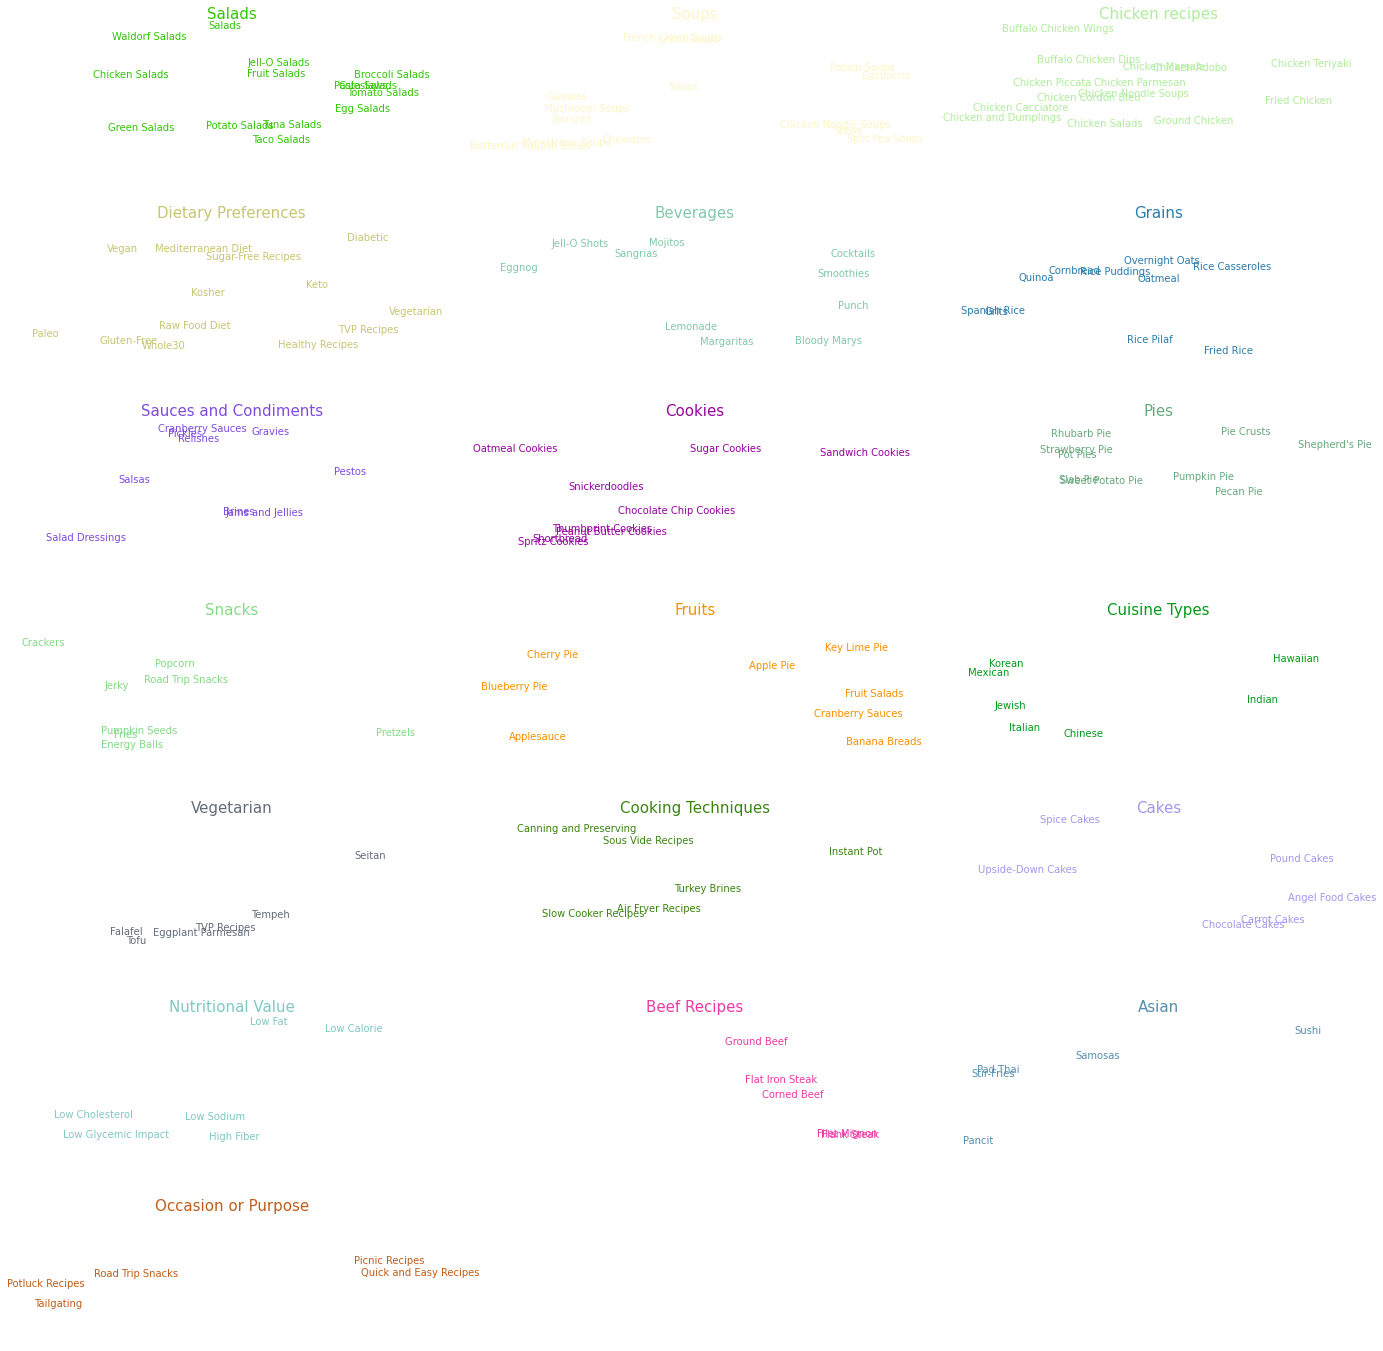

In [31]:
import matplotlib.pyplot as plt
import json
import numpy as np
import random

def plot_text_cloud(data, title, ax, color):
    """Plot a text cloud for given data and title on the given axis."""
    unique_items = list(set(data))
    x_coords = np.random.rand(len(unique_items))
    y_coords = np.random.rand(len(unique_items))
    
    for i, item in enumerate(unique_items):
        ax.text(x_coords[i], y_coords[i], item, ha='center', va='center', fontsize=10, color=color)
    
    ax.set_title(title, fontsize=15, color=color)
    ax.axis('off')

# Function to generate a random color
def random_color():
    return "#" + ''.join([random.choice('0123456789ABCDEF') for i in range(6)])

# Load the JSON data
with open("reversed_class_hierarchy.json", "r") as file:
    data = json.load(file)

filtered_data = {k: v for k, v in data.items() if len(v) > 4}

# Sort the data by number of subclasses
sorted_data = dict(sorted(filtered_data.items(), key=lambda item: len(item[1]), reverse=True))

# Extract data after top 10 superclasses
remaining_data = {k: sorted_data[k] for k in list(sorted_data)[10:]}

num_categories = len(remaining_data)
cols = 3
rows = (num_categories // cols) + (1 if num_categories % cols else 0)

fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=5.0)

col = 0
row = 0
for category, subclasses in remaining_data.items():
    color = random_color()
    plot_text_cloud(subclasses, category, axs[row][col], color)
    
    col += 1
    if col == cols:
        col = 0
        row += 1

for i in range(row, rows):
    for j in range(col, cols):
        axs[i][j].axis('off')

plt.show()
